# ImgLib2 

Example 6b - Convolution in Fourier space

## Introduction

In image processing, it is sometimes necessary to convolve images with non-separable kernels. This can be efficiently done in Fourier space exploiting the convolution theorem. It states that a convolution in real-space corresponds to a multiplication in Fourier-space, and vice versa. Note that the computation time for such a convolution is independent of the size and shape of the kernel.

*Note: that it is useful to normalize the kernel prior to Fourier convolution so that the sum of all pixels is one. Otherwise, the resulting intensities will be increased.*

**Important: This source code is only GPLv2!**

Some utility methods can be found below.

In [3]:
import net.imglib2.type.numeric.RealType
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.util.RealSum

utility = new Object() {
  /**
   * Computes the sum of all pixels in an iterable using RealSum
   *
   * @param <T> value type
   * @param iterable - the image data
   * @return - the sum of values
   */
  public <T extends RealType<T>> double sumImage(final Iterable<T> iterable) {
    final RealSum sum = new RealSum()
    
    for (final T type : iterable) {
      sum.add(type.getRealDouble())
    }
    
    return sum.getSum()
  }
  
  /**
   * Norms all image values so that their sum is 1
   *
   * @param iterable - the image data
   */
  public void norm(final Iterable<FloatType> iterable) {
    final double sum = sumImage(iterable)
    
    for (final FloatType type : iterable) {
      type.setReal(type.get() / sum)
    }
  }
}

Script2​$1​@23dfdd82

The implementation is as follows...

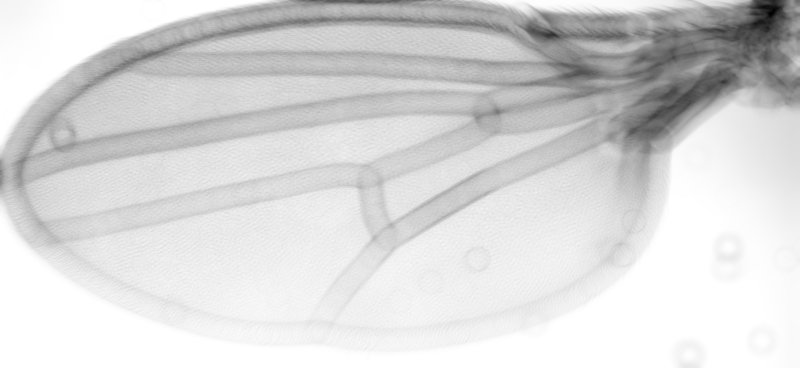

In [4]:
#@dependency(group = "net.imglib2", module = "imglib2-algorithm-gpl", version = "0.2.1")

import io.scif.img.ImgOpener
import net.imglib2.img.Img
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.algorithm.fft2.FFTConvolution
import net.imglib2.view.Views
import net.imglib2.RandomAccessibleInterval

// open image and kernel with ImgOpener as a FloatType
image = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)
kernel = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/kernelRing.tif",new FloatType()).get(0)

// normalize the kernel, otherwise we add energy to the image
utility.norm(kernel)

// compute & show fourier convolution (in-place)
fft2 = new FFTConvolution<FloatType>(image, kernel)
fft2.convolve()

image